Author - Ishan Kumar Anand

In [1]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np



Reading the Audio File and showing it via ipd 

In [2]:
audio_file = "/Users/ishananand/Desktop/ser/combined_dataset/angry/1007_IWW_ANG_XX.wav"
# It's an Anger Audio File
ipd.Audio(audio_file)

# Loading the Audio File via Librosa

- sampling rate states that how many samples per second were taken for the audio 
- audio_series = is the representation of that which contains Amplitude values over time
- for our use case we will keep the sr as 22.05 as humans sr ranges from 16KHz to 20.05KHz


In [ ]:
audio_series, sampling_rate = librosa.load(audio_file, sr=22050, mono=True, offset=0.5)
print("Audio File: ", audio_series)
print("Audio Series Shape: ", audio_series.shape)
print("Sampling rate: ", sampling_rate)

Audio File:  [ 1.9430905e-03  2.1565184e-03  2.1482897e-03 ... -1.9744402e-09
 -8.7665919e-10 -7.1735951e-10]
Audio Series Shape:  (62538,)
Sampling rate:  22050


# Melody Filter Bank
- n_fft is number of bins to select for Fast Fourier Transform used in short term fourier Transform
- n_mels is the number of melody filter bands to be created
- $librosa.filters.mel()$ is a 2D array where 
    - each row represents a mel filter
    - each column represents 1 frequency bin in fft spectrum
    - and the size of array will be (n_mels, n_fft//2 + 1)
- for human voices and speech recognition we choose n_fft as 2048 which provide good frequency time balance for  most speeches
- for human voices n_mels is selcted from range of 20 - 40 bins

In [ ]:
filter_bank = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=30)
print("Filter banks: ", filter_bank)
print("Shape: ", filter_bank.shape)


Filter banks:  [[0.0000000e+00 9.3454256e-04 1.8690851e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7026387e-05
  8.5131933e-06 0.0000000e+00]]
Shape:  (30, 1025)


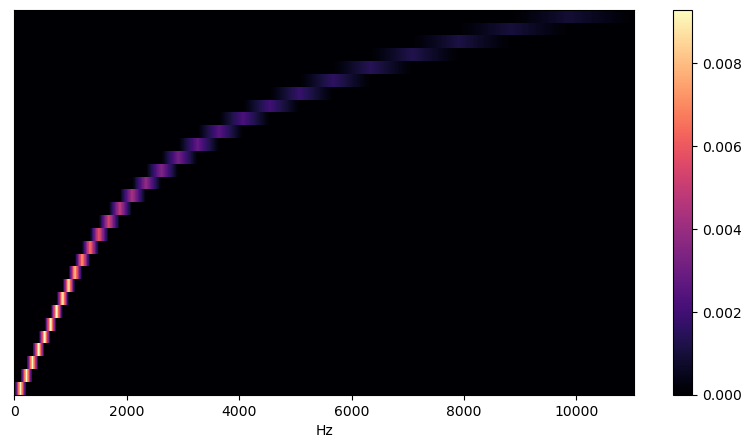

In [7]:
plt.figure(figsize=(10, 5))
# displaying the Mel Filters
librosa.display.specshow(
    data= filter_bank,
    sr = 22050,
    x_axis='linear',
)
plt.colorbar()
plt.show()
# You can count in the image there will be 30 mel_bands

# Mel Spectogram

- Mel Filter Banks are key to getting the Mel Spectograms
- Because the Mel Filters are multiplied with the initial Audio wave specogram to generate MEL Spectograms
- n_hop: number of samples between successive frames. (or) the distance between consecutive fft's

- Shape of the mel_spectogram is (n_mels, Time Axis (Number of Time Frames))
- by default n_mels = 128
- $ time frames = floor(L - n_fft / hopLength) + 1 $
    - L =  The length of Audio Signal
    - n_fft(fast fourier transform or window length)
    - hoplength is n_hop

In [8]:
mel_spectogram = librosa.feature.melspectrogram(y=audio_series,
                                                sr = 22050,
                                                n_fft=2048,
                                                hop_length=512,
                                                # n_mels=40
                                                # for us n_mels is 128 much varied freq range
                                                )
print("Mel Spectogram: ", mel_spectogram)
print("Shape: ", mel_spectogram.shape)

Mel Spectogram:  [[2.54310723e-02 1.33275181e-01 8.38165581e-02 ... 8.67037848e-02
  2.25443333e-01 3.11508328e-01]
 [3.93094271e-02 6.94459304e-02 1.08414494e-01 ... 2.98072472e-02
  6.74457476e-02 6.33773878e-02]
 [1.31350039e-02 8.53864253e-02 1.17538869e-01 ... 3.92148457e-02
  2.96824500e-02 3.54396887e-02]
 ...
 [1.08157985e-06 2.68978368e-07 4.83170395e-14 ... 6.45226871e-16
  9.08037637e-16 4.89742221e-16]
 [1.06542825e-06 2.64994640e-07 1.02527314e-13 ... 7.26825340e-17
  4.48288614e-17 2.51479135e-17]
 [1.05551101e-06 2.62548156e-07 4.08335712e-14 ... 3.29340406e-17
  4.36090678e-17 2.58694036e-17]]
Shape:  (128, 101)


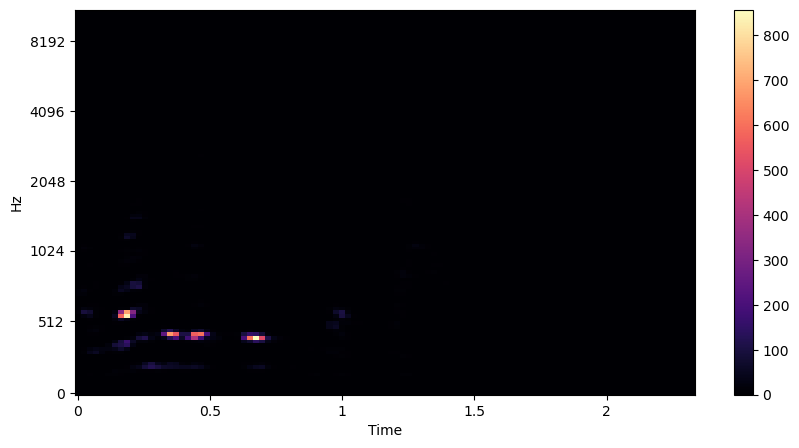

[[-15.946354   -8.752507  -10.766702  ... -10.619619   -6.469626
   -5.0653033]
 [-14.055033  -11.583532   -9.649126  ... -15.256782  -11.710454
  -11.980657 ]
 [-18.815697  -10.686111   -9.298185  ... -14.065495  -15.2750025
  -14.505101 ]
 ...
 [-50.671684  -50.671684  -50.671684  ... -50.671684  -50.671684
  -50.671684 ]
 [-50.671684  -50.671684  -50.671684  ... -50.671684  -50.671684
  -50.671684 ]
 [-50.671684  -50.671684  -50.671684  ... -50.671684  -50.671684
  -50.671684 ]]


In [9]:
melSpectogram = librosa.power_to_db(mel_spectogram)
plt.figure(figsize=(10, 5))
# displaying the Mel Filters
librosa.display.specshow(
    data= mel_spectogram,
    x_axis="time",
    y_axis="mel",
    sr = 22050
)
plt.colorbar()
plt.show()
print(melSpectogram)

Log Melspectogram is what we Human hear (into Decibal Scale)
- $ dB(x)=10 * log10(x / ref) $
- ref as np.max -> This ensures that the highest value in the spectrogram will correspond to 0 dB (the loudest point in the spectrogram).
- ref as np.min -> This would cause the lowest value in the spectrogram to correspond to 0 dB, and all other values would be positive dB values relative to the minimum.
- In practice (np.min) is less common in audio processing because the minimum value in a spectrogram is often 0 (or close to 0), which would lead to numerical issues or an undesired scaling where values are shifted upwards.

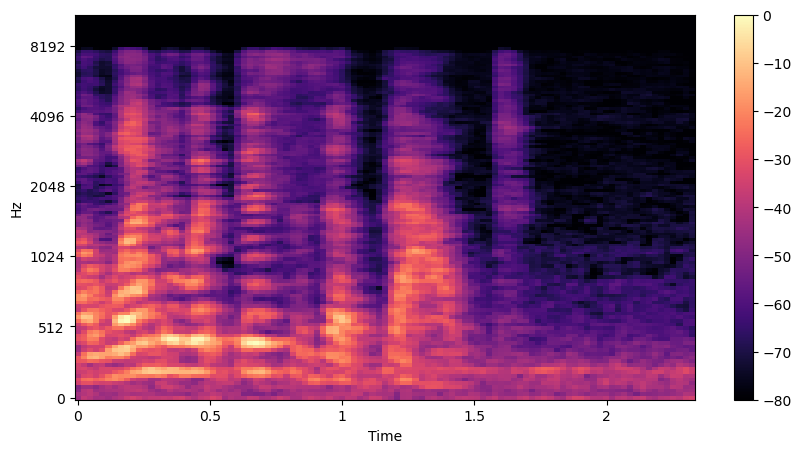

[[-45.27467  -38.080822 -40.095016 ... -39.947937 -35.797943 -34.39362 ]
 [-43.383347 -40.91185  -38.97744  ... -44.5851   -41.03877  -41.30897 ]
 [-48.144012 -40.014427 -38.626503 ... -43.39381  -44.603317 -43.833416]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


In [10]:
logarithmic_melSpectogram = librosa.power_to_db(mel_spectogram, ref=np.max)
plt.figure(figsize=(10, 5))
# displaying the Mel Filters
librosa.display.specshow(
    data= logarithmic_melSpectogram,
    x_axis="time",
    y_axis="mel",
    sr = 22050
)
plt.colorbar()
plt.show()
print(logarithmic_melSpectogram)

In [11]:
logarithmic_melSpectogram.shape

(128, 101)

In [12]:
a = librosa.feature.melspectrogram(y=audio_series, sr = 22050, n_fft=2048, hop_length=512)


b = librosa.power_to_db(mel_spectogram, ref=np.max)


In [ ]:
audio_series, sampling_rate = librosa.load(audio_file, sr=22050, duration=3, offset=0.5)
print("Audio File: ", audio_series)
print("Audio Series Shape: ", audio_series.shape)
print("Sampling rate: ", sampling_rate)

Audio File:  [-8.5207727e-03 -9.6543459e-03 -9.2675984e-03 ...  1.1170159e-10
 -1.2907310e-09 -6.8368256e-10]
Audio Series Shape:  (51513,)
Sampling rate:  22050


In [31]:
audio_series, sampling_rate = librosa.load(audio_file, sr=22050, duration=4, offset=0.5)
mfcc = librosa.feature.mfcc(y = audio_series, sr=sampling_rate, n_mfcc=40)
print(mfcc, mfcc.shape)

[[-258.03876   -213.18039   -218.91325   ... -468.98184   -465.74194
  -467.60464  ]
 [ 161.48904    165.48483    172.83528   ...  104.8224     104.27425
   106.830986 ]
 [  -7.9587593   -9.11039      5.4582834 ...   59.519775    56.444893
    49.05533  ]
 ...
 [   2.4686794    3.2492855    3.9451776 ...    7.054822     4.957404
     4.6452866]
 [   4.707791     3.141325    -1.8287328 ...   -1.9958947   -6.0935984
     1.1392086]
 [  -1.776976     1.3934836    1.1425267 ...   -6.5866213   -7.8621855
    -2.0589547]] (40, 101)


In [58]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    print("ZCR: ", zcr, zcr.shape, result)

    # # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    print("Chroma STFT: " ,chroma_stft, chroma_stft.shape, result, result.shape)

    # # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    print("MFCC: ", mfcc, mfcc.shape, result, result.shape)

    # # Root Mean Square Value
    # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) # stacking horizontally

    # # MelSpectogram
    # mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [ ]:
def extract_speech_features(audio_path, sample_rate=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sample_rate, offset=0.4, duration=4)
    
    # Mel-frequency Cepstral Coefficients (MFCCs)
    mfcc_features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30) # Mean of MFCCs
    mfcc = np.mean(mfcc_features.T, axis=0) # along the row
    # print("MFCC Feat: ", mfcc_features, mfcc_features.shape)
    # print("Mean MFCC: ", mfcc, mfcc.shape)
    
    
    # Root Mean Square Energy (RMS)
    rms_features = librosa.feature.rms(y=y)
    rms = np.mean(rms_features.T, axis=0)
    # print("RMS Features: ", rms_features, rms_features.shape)
    # print("Mean RMS: ", rms, rms.shape)
    
    # Zero Crossing Rate (ZCR)
    zcr_features = librosa.feature.zero_crossing_rate(y=y)
    zcr = np.mean(zcr_features.T, axis=0)
    # print("ZCR Features: ", zcr_features, zcr_features.shape)
    # print("Mean ZCR: ", zcr, zcr.shape)
    
    # Spectral Centroid
    spectralCentroid_features = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid = np.mean(spectralCentroid_features.T, axis=0)
    # print("Spectral Centroid Features: ", spectralCentroid_features, spectralCentroid_features.shape)
    # print("Mean SPC: ", spectral_centroid, spectral_centroid.shape)
    
    # Spectral Rolloff
    spectral_rolloff_features = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
    spectral_rolloff = np.mean(spectral_rolloff_features.T, axis=0)  # roll_percent instead of threshold
    # print("Spectral Rolloff Features: ", spectral_rolloff_features, spectral_rolloff_features.shape)
    # print("Mean SPCrolloff: ", spectral_rolloff, spectral_rolloff.shape)

    
    # Chroma Features
    stft = np.abs(librosa.stft(y=y))
    chroma_features = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    chroma_stft = np.mean(chroma_features.T, axis=0)
    # print("Chroma Features: ", chroma_features, chroma_features.shape)
    # print("Chroma STFT: ", chroma_stft, chroma_stft.shape)

    
    # Combine all features into a single feature vector
    features = np.hstack((mfcc, rms, zcr, spectral_centroid, spectral_rolloff, chroma_stft))
    print(features.shape)
    
    return features

# Example usage
# audio_path = 'path_to_audio_file.wav'
features = extract_speech_features(audio_file)
print(features)


(46,)
[-3.24378632e+02  1.25340752e+02  1.01395311e+01  3.42853432e+01
 -1.17251978e+01  1.19729815e+01 -4.65847349e+00 -2.77185369e+00
 -1.35658770e+01  2.97446346e+00 -2.88109207e+00 -5.72800064e+00
 -3.53653598e+00 -7.72164869e+00  6.56924772e+00 -8.31123829e+00
 -2.18647552e+00 -2.83082128e+00  1.01365232e+00 -5.52980042e+00
 -3.91734338e+00 -4.53829718e+00 -6.11160755e+00  3.36186862e+00
 -1.93721342e+00  3.73771763e+00 -3.12702870e+00 -1.86572313e+00
 -3.34189463e+00 -2.91390181e+00  5.30826971e-02  5.53896949e-02
  1.32984790e+03  2.81644043e+03  4.93994772e-01  4.97067302e-01
  5.17404735e-01  5.11969686e-01  4.83326465e-01  5.08709311e-01
  5.57103574e-01  6.70830011e-01  8.00171137e-01  7.16165543e-01
  5.38217247e-01  5.11269689e-01]
